<a href="https://colab.research.google.com/github/rahiakela/computer-vision-research-and-practice/blob/main/opencv-projects-and-guide/ocr-with-opencv-and-tesseract/03_whitelisting_and_blacklisting_characters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Whitelisting and Blacklisting Characters with Tesseract

In [ ]:
%%shell

sudo apt install tesseract-ocr
pip install tesseract
pip install pytesseract
pip install Pillow==9.0.0

Just restart the colab environment.

In [1]:
import cv2
import pytesseract
import csv

from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

%matplotlib inline

In [2]:
pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')

Let's download images.

In [ ]:
%%shell

wget https://github.com/rahiakela/computer-vision-research-and-practice/raw/main/opencv-projects-and-guide/ocr-with-opencv-and-tesseract/images/license_plate.png

Let's define some function.

In [23]:
def show_image(img_path):
  # load the input image and convert it from BGR to RGB channel ordering
  image = cv2.imread(img_path)
  plt.imshow(image)

def extract_text(img_path, whitelist=[], blacklist=[]):
  image = cv2.imread(img_path)

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # check to see if *digit only* OCR should be performed, and if so, update Tesseract OCR options
  options = ""
  if len(whitelist) > 0:
    options += "-c tessedit_char_whitelist={}".format(whitelist)
  if len(blacklist) > 0:
    options += "-c tessedit_char_blacklist={}".format(blacklist)

  # use Tesseract to OCR the image
  text = pytesseract.image_to_string(image, config=options)
  return text

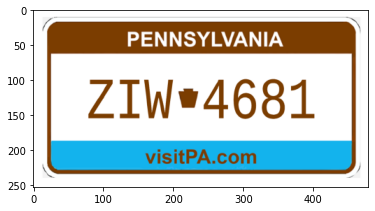

In [4]:
show_image("license_plate.png")

In [24]:
print(extract_text("license_plate.png"))

aN

ZIW*4681

visitPA.com

 



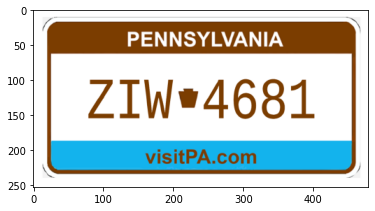

In [9]:
show_image("license_plate.png")

In [25]:
print(extract_text("license_plate.png", blacklist="*#"))

aN

ZIW*4681

visitPA.com

 



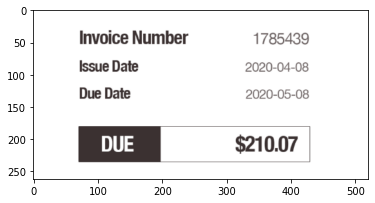

In [16]:
show_image("invoice.png")

In [26]:
print(extract_text("invoice.png", blacklist="*#"))

Invoice Number 1785439
Issue Date 2020-04-08
Due Date 2020-05-08

| DU E | $210.07

 



In [27]:
print(extract_text("invoice.png", whitelist="0123456789.-"))

Invoice Number 1785439
Issue Date 2020-04-08
Due Date 2020-05-08

| DU E | $210.07

 

